### Build a DNN using Keras with `RELU` and `ADAM`

In [0]:
!pip3 install -U tensorflow==2.0.0 --quiet

#### Load tensorflow

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Checking the version of Tenserflow
tf.__version__

'2.0.0'

#### Collect Fashion mnist data from tf.keras.datasets 

In [4]:
##Download dataset
(trainX, trainY),(testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
#Check number of training examples and size of each example
print(trainX.shape)

(60000, 28, 28)


In [6]:
#Check number of test examples and size of each example
print(testX.shape)

(10000, 28, 28)


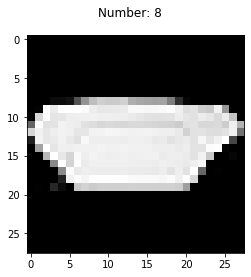

In [7]:
#Let's review the data
img_num = np.random.randint(0, testX.shape[0]) #Get a random integer between 0 and number of examples in test dataset
plt.imshow(testX[img_num],cmap='gray') #Show the image from test dataset
plt.suptitle('Number: ' + str(testY[img_num]))
plt.show()

#### Change train and test labels into one-hot vectors

In [8]:
#Check current label size
testY[0]

9

In [0]:
#Converting labels to one hot encoding
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [10]:
#Now check the label size
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

#### Build the Graph

#### Initialize model, reshape & normalize data

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
#Two Fully Connected layers or Hidden layers
model.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_2'))
model.add(tf.keras.layers.BatchNormalization())

#Dropout layer
model.add(tf.keras.layers.Dropout(0.25))


### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [13]:
#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Summarise the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

**Model Summary**

> From the table , We can see 2 fully connected layers and output layer

1.   Layer 1 with 200 Neurons
2.   Layer 2 with 100 Neurons
3.   Output layer with 10 neurons

In [15]:
#Train the model
model.fit(trainX,trainY,
          validation_data=(testX,testY),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2469 - accuracy: 0.9071 - val_loss: 0.3321 - val_accuracy: 0.8885
Epoch 2/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.2413 - accuracy: 0.9092 - val_loss: 0.3511 - val_accuracy: 0.8828
Epoch 3/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.2352 - accuracy: 0.9122 - val_loss: 0.3153 - val_accuracy: 0.8958
Epoch 4/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.2286 - accuracy: 0.9163 - val_loss: 0.3297 - val_accuracy: 0.8924
Epoch 5/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.2217 - accuracy: 0.9175 - val_loss: 0.3402 - val_accuracy: 0.8933
Epoch 6/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.2162 - accuracy: 0.9189 - val_loss: 0.3322 - val_accuracy: 0.8932
Epoch 7/10
60000/60000 [==========================